# Importar llibreries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Importar taules amb pandas i vista d'ocell

In [4]:
taula=pd.read_csv("/Users/oscarpo/documents/NFLX.csv")

In [6]:
taula.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2019-12-17,307.359985,316.799988,306.600006,315.480011,315.480011,10427100
248,2019-12-18,316.260010,325.359985,315.600006,320.799988,320.799988,11207400
249,2019-12-19,324.500000,332.829987,324.179993,332.220001,332.220001,9822300
250,2019-12-20,335.000000,338.000000,330.600006,336.899994,336.899994,9914900
251,2019-12-23,337.760010,337.950012,331.040009,333.100006,333.100006,5130465


In [8]:
taula.shape

(252, 7)

# Creació variables bàsiques

In [74]:
taula['Close1']=taula['Close'].shift(-1)

In [65]:
#diferencia de preu respecte al del di seguent
taula['PriceDiff'] = taula['Close'].shift(-1)- taula['Close']

In [66]:
taula['Return'] = taula['PriceDiff'] /taula['Close']

In [67]:
#Create a new column Direction. 
#The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
#for every record in the DataFrame - taula

taula['Direction'] = [1 if taula['PriceDiff'].loc[ei] > 0 else 0 for ei in taula.index ]

In [68]:
taula['ma10'] = taula['Close'].rolling(10).mean() #fast signal
taula['ma50'] = taula['Close'].rolling(50).mean() #slow signal

taula.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,ma50,ma60,ma20,ma10
247,2019-12-17,307.359985,316.799988,306.600006,315.480011,315.480011,10427100,5.319977,0.016863,1,293.139999,288.722665,306.520999,302.570999
248,2019-12-18,316.260010,325.359985,315.600006,320.799988,320.799988,11207400,11.420013,0.035599,1,294.141598,289.826165,307.430998,304.218997
249,2019-12-19,324.500000,332.829987,324.179993,332.220001,332.220001,9822300,4.679993,0.014087,1,295.435399,290.950665,308.783998,307.154999
250,2019-12-20,335.000000,338.000000,330.600006,336.899994,336.899994,9914900,-3.799988,-0.011279,0,296.563798,292.177165,310.044498,310.109998
251,2019-12-23,337.760010,337.950012,331.040009,333.100006,333.100006,5130465,NaN,NaN,0,297.567198,293.344165,311.175497,313.169998


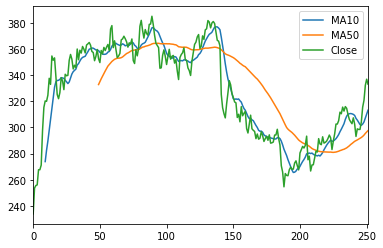

In [69]:
#plot the moving average
#plt.figure(figsiz2=(10, 8))
taula['ma10'].plot(label='MA10')
taula['ma50'].plot(label='MA50')
taula['Close'].plot(label='Close')
plt.legend()
plt.show()

# Creació Factors:

In [ ]:
#pendent

# Creació Puntuacions:

In [ ]:
#pendent

# Estratègia 1: Si MA10 > MA50 --> Buy and hold 1 share

In [73]:
taula['shares']=[1 if taula.loc[ei,'ma10'] > taula.loc[ei,'ma50'] else 0
              for ei in taula.index]

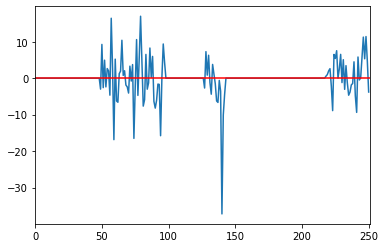

In [80]:
taula['profit']=[taula.loc[ei,'Close1'] - taula.loc[ei,'Close'] 
                 if taula.loc[ei, 'shares']==1 else 0
                 for ei in taula.index]

taula['profit'].plot()
plt.axhline(y=0,color='red')

In [81]:
taula['wealth']=taula['profit'].cumsum()

In [82]:
taula.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,ma50,ma60,ma20,ma10,shares,Close1,profit,wealth
247,2019-12-17,307.359985,316.799988,306.600006,315.480011,315.480011,10427100,5.319977,0.016863,1,293.139999,288.722665,306.520999,302.570999,1,320.799988,5.319977,-19.920013
248,2019-12-18,316.260010,325.359985,315.600006,320.799988,320.799988,11207400,11.420013,0.035599,1,294.141598,289.826165,307.430998,304.218997,1,332.220001,11.420013,-8.500000
249,2019-12-19,324.500000,332.829987,324.179993,332.220001,332.220001,9822300,4.679993,0.014087,1,295.435399,290.950665,308.783998,307.154999,1,336.899994,4.679993,-3.820007
250,2019-12-20,335.000000,338.000000,330.600006,336.899994,336.899994,9914900,-3.799988,-0.011279,0,296.563798,292.177165,310.044498,310.109998,1,333.100006,-3.799988,-7.619995
251,2019-12-23,337.760010,337.950012,331.040009,333.100006,333.100006,5130465,NaN,NaN,0,297.567198,293.344165,311.175497,313.169998,1,NaN,NaN,NaN


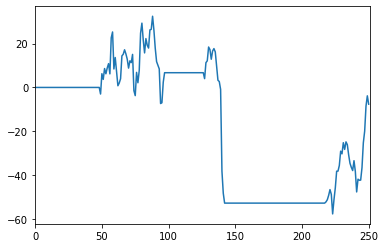

In [83]:
taula['wealth'].plot()